In [7]:
# DTWを二次元に拡張したファイル

In [8]:
import numpy as np
import pylab as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from tslearn.metrics import dtw_path

In [9]:
# 距離計算
def dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

# 最小値を求める
def get_min(m0, m1, m2, i, j):
    if m0 < m1:
        if m0 < m2:
            return i - 1, j, m0
        else:
            return i - 1, j - 1, m2
    else:
        if m1 < m2:
            return i, j - 1, m1
        else:
            return i - 1, j - 1, m2

In [11]:
def spring(a, b, epsilon):
    Ta = len(a)
    Tb = len(b)

    # C:各マスの累積コスト，　B：最小コストの行/列番号， S:コスト最小のパスの開始位置
    C = np.zeros((Ta, Tb))
    B = np.zeros((Ta, Tb, 2), int)
    S = np.zeros((Ta, Tb), int)

    C[0, 0] = dist(a[0], b[0])

    # 一番左の列は，真っ直ぐ上にコストが累積される
    for j in range(1, Tb):
        C[0, j] = C[0, j - 1] + dist(a[0], b[j])
        B[0, j] = [0, j - 1]
        S[0, j] = S[0, j - 1]
        
    for i in range(1, Ta):
        # 一番下の列のコストは，そのマス自身のコストのみにする
        C[i, 0] = dist(a[i], b[0])
        B[i, 0] = [0, 0]
        # スタート地点の行番号を保持
        S[i, 0] = i
        
        # 上方向にコストを計算
        for j in range(1, Tb):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            C[i, j] = dist(a[i], b[j]) + m
            # print(C[i, j])
            B[i, j] = [pi, pj]
            # スタート地点の行番号を保持
            S[i, j] = S[pi, pj]
            
        # 最小のDTW距離の終点の行番号
        imin = np.argmin(C[:(i+1), -1])
        
        # 最小のDTW距離
        dmin = C[imin, -1]
        
        # dminがepsilonより大きければ抜ける
        if dmin > epsilon:
            continue
                
        for j in range(1, Tb):
            # コストがdminより小さいかつ,区間が被る場合は，
            # dminは最小コストではなくなるため次へ
            if (C[i,j] < dmin) and (S[i, j] < imin):
                break
                
        else:
            path = [[imin, Tb - 1]]
            temp_i = imin
            temp_j = Tb - 1
            
            while (B[temp_i, temp_j][0] != 0 or B[temp_i, temp_j][1] != 0):
                path.append(B[temp_i, temp_j])
                temp_i, temp_j = B[temp_i, temp_j].astype(int)
                
            C[S <= imin] = 100000000
            yield np.array(path), dmin

In [12]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/546606409.csv", encoding="shift-jis", usecols=[2,3]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/lowerLeft.csv", encoding="shift-jis", usecols=[2,3]).values

<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


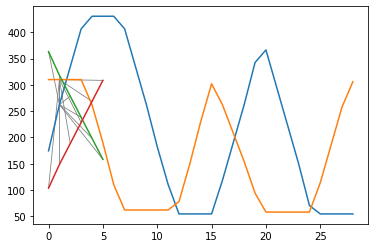

[1 1 1 1 1 1]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


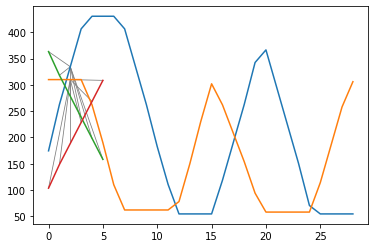

[2 2 2 2 2 2]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


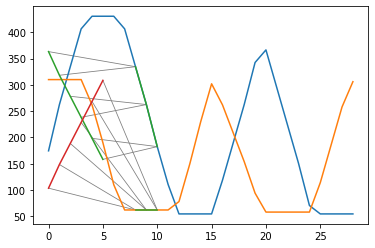

[10 10  9  9  8  8]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


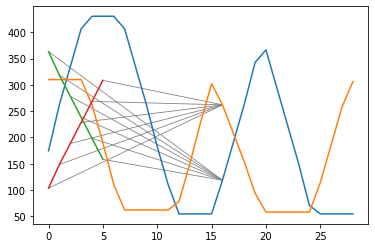

[16 16 16 16 16 16]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


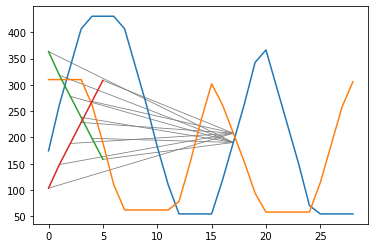

[17 17 17 17 17 17]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


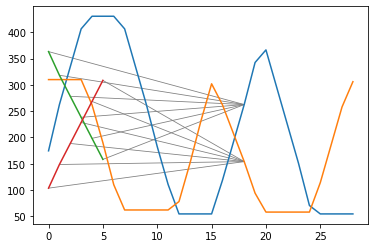

[18 18 18 18 18 18]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


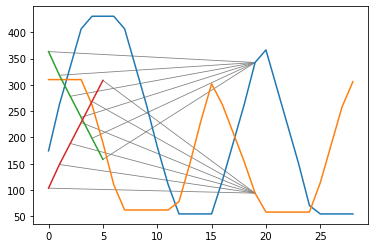

[19 19 19 19 19 19]


<ipython-input-16-da65615b1499>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(path[:,0], data[path[:,0]], C="C2")


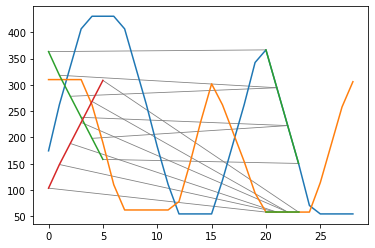

[23 22 22 21 21 20]


In [16]:
pathes = []
for path, cost in spring(data, inputData, 1000):
    for line in path:
        plt.plot(line, [data[line[0]], inputData[line[1]]], linewidth=0.8, c="gray")
    plt.plot(data)
    plt.plot(inputData)
    plt.plot(path[:,0], data[path[:,0]], C="C2")
    plt.show()
    pathes.append(path)
    # 類似している箇所のインデックス
    print(path[:,0])